# Import

In [230]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [185]:
from sklearn.pipeline import Pipeline

# Load

In [186]:
df_original = pd.read_csv("HW3_movie_metadata.csv")
df = df_original.copy()

In [187]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,Christoph Waltz,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


In [188]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,"4,993.00","5,028.00","4,939.00","5,020.00","5,036.00","4,159.00","5,043.00","5,043.00","5,030.00","5,022.00","4,551.00","4,935.00","5,030.00","5,043.00","4,714.00","5,043.00"
mean,140.19,107.20,686.51,645.01,"6,560.05","48,468,407.53","83,668.16","9,699.06",1.37,272.77,"39,752,620.44","2,002.47","1,651.75",6.44,2.22,"7,525.96"
std,121.60,25.20,"2,813.33","1,665.04","15,020.76","68,452,990.44","138,485.26","18,163.80",2.01,377.98,"206,114,898.45",12.47,"4,042.44",1.13,1.39,"19,320.45"
min,1.00,7.00,0.00,0.00,0.00,162.00,5.00,0.00,0.00,1.00,218.00,"1,916.00",0.00,1.60,1.18,0.00
25%,50.00,93.00,7.00,133.00,614.00,"5,340,987.50","8,593.50","1,411.00",0.00,65.00,"6,000,000.00","1,999.00",281.00,5.80,1.85,0.00
50%,110.00,103.00,49.00,371.50,988.00,"25,517,500.00","34,359.00","3,090.00",1.00,156.00,"20,000,000.00","2,005.00",595.00,6.60,2.35,166.00
75%,195.00,118.00,194.50,636.00,"11,000.00","62,309,437.50","96,309.00","13,756.50",2.00,326.00,"45,000,000.00","2,011.00",918.00,7.20,2.35,"3,000.00"
max,813.00,511.00,"23,000.00","23,000.00","640,000.00","760,505,847.00","1,689,764.00","656,730.00",43.00,"5,060.00","12,215,500,000.00","2,016.00","137,000.00",9.50,16.00,"349,000.00"


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [190]:
df.value_counts()

director_name     num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes  actor_2_name         actor_1_facebook_likes  gross          genres                                actor_1_name         movie_title          num_voted_users  cast_total_facebook_likes  actor_3_name     facenumber_in_poster  plot_keywords                                                      movie_imdb_link                                       num_user_for_reviews  language  country      content_rating  budget         title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
Frank Oz          168.00                  87.00     0.00                     548.00                  Ewen Bremner         22,000.00               8,579,684.00   Comedy                                Peter Dinklage       Death at a Funeral   89547            24324                      Kris Marshall    0.00                  end credits roll call|four word title|funeral|secret|uncle         http:

In [191]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [192]:
# # Set the style of seaborn for better aesthetics
# sns.set(style="whitegrid")

# # Get the number of numerical columns and decide the number of columns in the grid
# num_cols = df.select_dtypes(include='number').columns
# num_plots = len(num_cols)

# # Set the number of columns in the grid (you can adjust this based on your preference)
# num_cols_in_grid = 6

# # Calculate the number of rows needed
# num_rows = (num_plots + num_cols_in_grid - 1) // num_cols_in_grid

# # Increase the height of each subplot by adjusting the figsize parameter
# fig, axes = plt.subplots(num_rows, num_cols_in_grid, figsize=(50, 20))  # Adjust the figure size as needed

# # Flatten the axes array for easy iteration
# axes = axes.flatten()

# # Loop through each numerical column and plot histogram with KDE on a separate subplot
# for i, column in enumerate(num_cols):
#     sns.histplot(df[column], kde=False, bins=30, ax=axes[i])  # Adjust bins as needed
#     axes[i].set_title(f'Histogram with KDE for {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Frequency')

# # Remove any empty subplots if the number of plots is not a multiple of num_cols_in_grid
# for j in range(num_plots, len(axes)):
#     fig.delaxes(axes[j])

# # Adjust layout for better spacing
# plt.tight_layout()
# plt.show()

<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

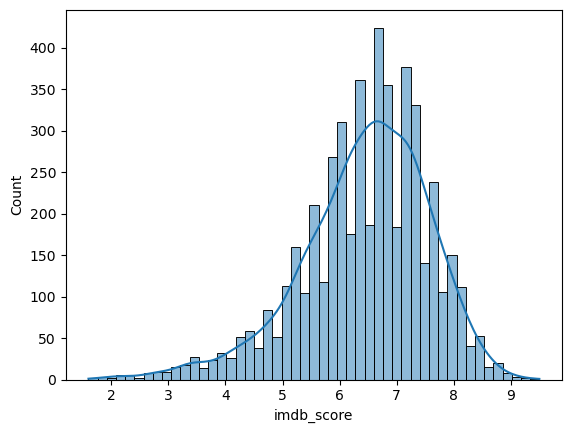

In [193]:
# Distribution of the data
sns.histplot(df["imdb_score"], kde=True)

# Preprocessing

Cut the middle part of the data to avoid the ambiguity between low and high and use median as the boundary

Choose to cut percentile 40-60

In [194]:
median = df.imdb_score.median()
print("median =", median)

median = 6.6


In [195]:
# Calculate the 40th and 60th percentiles of the 'imdb_score' column
percentile_40 = df['imdb_score'].quantile(0.4)
percentile_60 = df['imdb_score'].quantile(0.6)

# Create a mask to select rows outside the 40-60 percentile range
mask = (df['imdb_score'] < percentile_40) | (df['imdb_score'] > percentile_60)

# Use the mask to drop the selected rows
df_cut = df[mask]

df_cut

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0
6,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,...,"1,902.00",English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.00,77.00,291.00,8.00,David Sullivan,291.00,"424,760.00",Drama|Sci-Fi|Thriller,Shane Carruth,...,371.00,English,USA,PG-13,"7,000.00","2,004.00",45.00,7.00,1.85,19000
5035,Robert Rodriguez,56.00,81.00,0.00,6.00,Peter Marquardt,121.00,"2,040,920.00",Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,130.00,Spanish,USA,R,"7,000.00","1,992.00",20.00,6.90,1.37,0
5036,Anthony Vallone,NaN,84.00,2.00,2.00,John Considine,45.00,NaN,Crime|Drama,Richard Jewell,...,1.00,English,USA,PG-13,"3,250.00","2,005.00",44.00,7.80,NaN,4
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,6.00,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84


Add new binary column call "label" with 1 = high score, 0 = low score

In [196]:
df_cut['label'] = np.where(df_cut['imdb_score'] < median, 0.0, 1.0)
df_cut

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,label
0,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000,1.00
1,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,Johnny Depp,...,English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0,1.00
3,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,Tom Hardy,...,English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000,1.00
4,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0,1.00
6,Sam Raimi,392.00,156.00,0.00,"4,000.00",James Franco,"24,000.00","336,530,303.00",Action|Adventure|Romance,J.K. Simmons,...,English,USA,PG-13,"258,000,000.00","2,007.00","11,000.00",6.20,2.35,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.00,77.00,291.00,8.00,David Sullivan,291.00,"424,760.00",Drama|Sci-Fi|Thriller,Shane Carruth,...,English,USA,PG-13,"7,000.00","2,004.00",45.00,7.00,1.85,19000,1.00
5035,Robert Rodriguez,56.00,81.00,0.00,6.00,Peter Marquardt,121.00,"2,040,920.00",Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,...,Spanish,USA,R,"7,000.00","1,992.00",20.00,6.90,1.37,0,1.00
5036,Anthony Vallone,NaN,84.00,2.00,2.00,John Considine,45.00,NaN,Crime|Drama,Richard Jewell,...,English,USA,PG-13,"3,250.00","2,005.00",44.00,7.80,NaN,4,1.00
5038,Scott Smith,1.00,87.00,2.00,318.00,Daphne Zuniga,637.00,NaN,Comedy|Drama,Eric Mabius,...,English,Canada,NaN,NaN,"2,013.00",470.00,7.70,NaN,84,1.00


In [197]:
df_cut[["label", "imdb_score"]]

,label,imdb_score
0,1.00,7.90
1,1.00,7.10
3,1.00,8.50
4,1.00,7.10
6,0.00,6.20
...,...,...
5033,1.00,7.00
5035,1.00,6.90
5036,1.00,7.80
5038,1.00,7.70


<AxesSubplot:xlabel='imdb_score', ylabel='Count'>

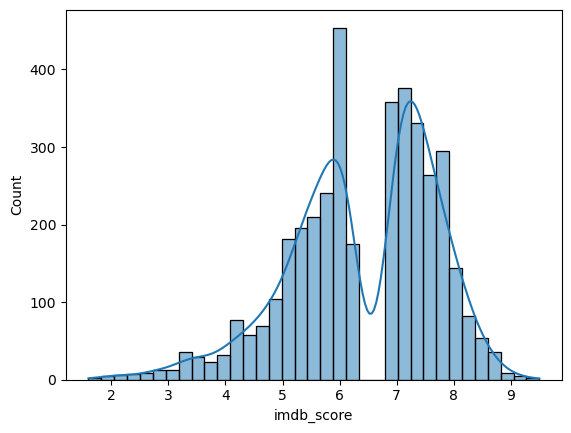

In [198]:
sns.histplot(df_cut["imdb_score"], kde=True)

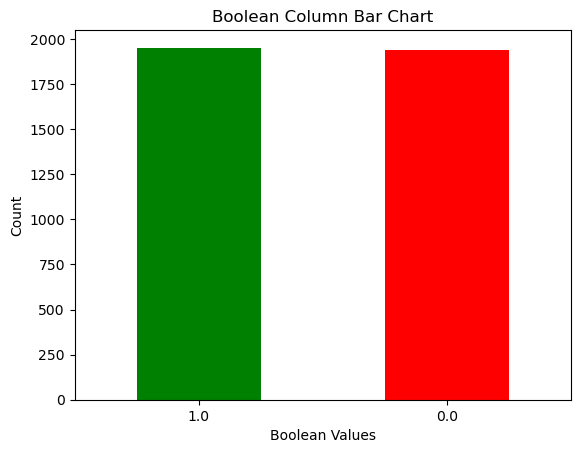

In [199]:
# Count the occurrences of each boolean value in the 'BooleanColumn'
counts = df_cut['label'].value_counts()

# Plot a bar chart
counts.plot(kind='bar', color=['green', 'red'], rot=0)

# Add labels and title
plt.xlabel('Boolean Values')
plt.ylabel('Count')
plt.title('Boolean Column Bar Chart')

# Show the plot
plt.show()

Drop imdb_score column

In [200]:
df_cut.drop(columns=["imdb_score"],inplace=True)

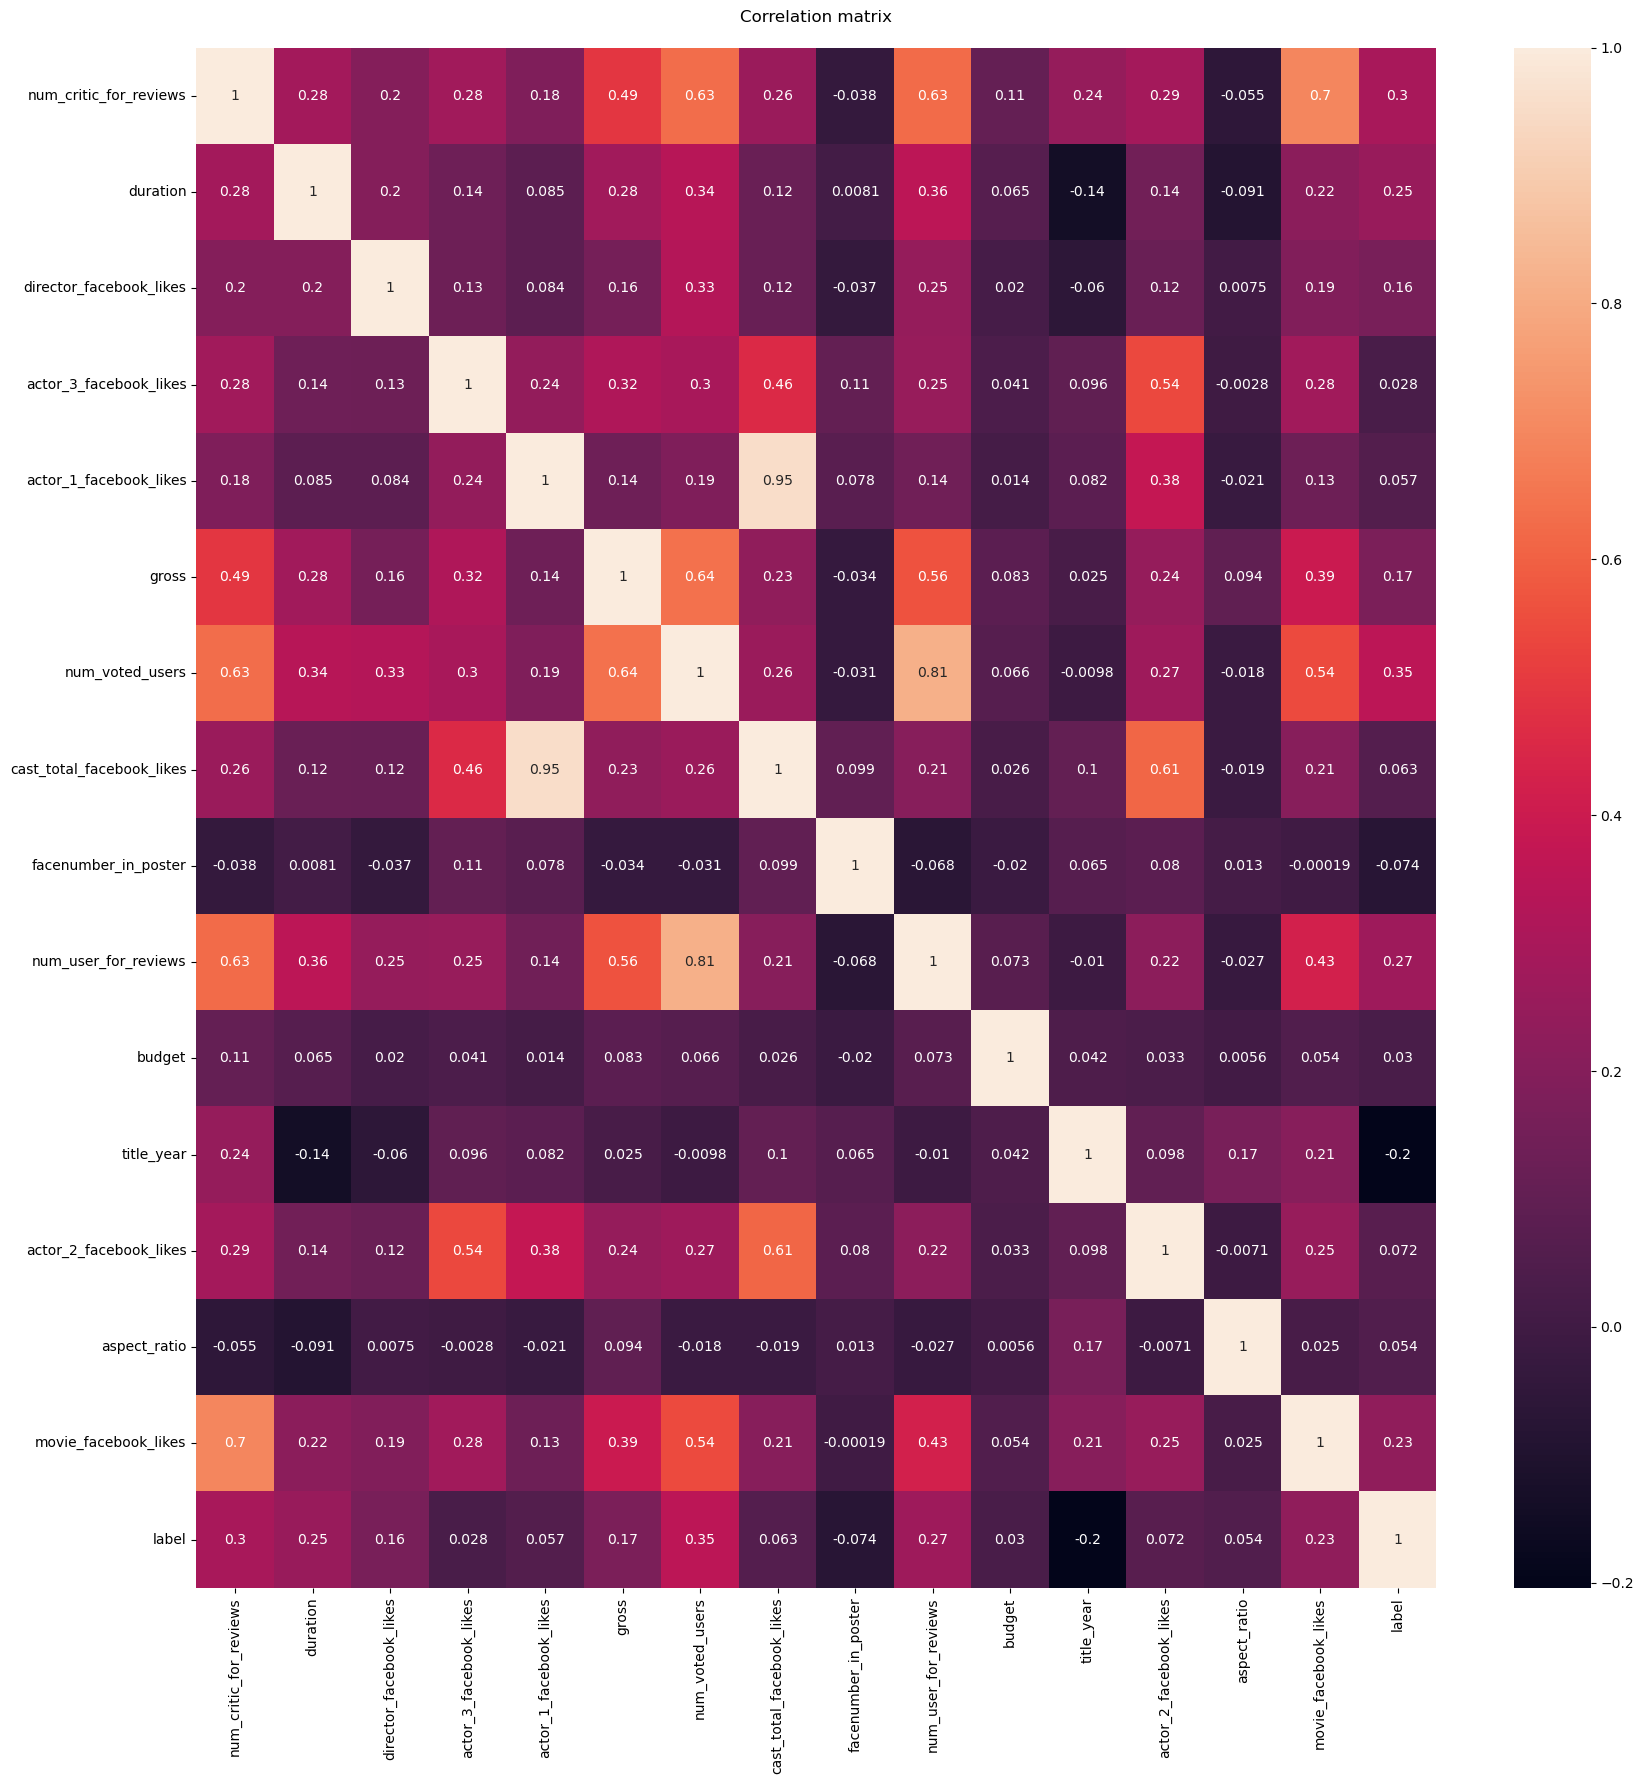

In [201]:
corr = df_cut.corr()
plt.figure(figsize=(20,20))
heatmap = sns.heatmap(corr, annot = True)
heatmap.set(title = "Correlation matrix\n")  
plt.show()  

In [202]:
# Set the target column
target_column = 'label'

# Set the correlation threshold
correlation_threshold = 0.2

# Calculate the correlation between features and the target column
correlation_with_target = df_cut.corr()[target_column]

# Find columns with correlation below the threshold
columns_to_drop = [col for col in correlation_with_target.index if abs(correlation_with_target[col]) < correlation_threshold]
print(columns_to_drop)

df2 = df_cut.drop(columns=columns_to_drop)
df2.T

['director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'cast_total_facebook_likes', 'facenumber_in_poster', 'budget', 'actor_2_facebook_likes', 'aspect_ratio']


,0,1,3,4,6,7,8,9,10,11,...,5026,5027,5029,5030,5031,5033,5035,5036,5038,5039
director_name,James Cameron,Gore Verbinski,Christopher Nolan,Doug Walker,Sam Raimi,Nathan Greno,Joss Whedon,David Yates,Zack Snyder,Bryan Singer,...,Olivier Assayas,Jafar Panahi,Kiyoshi Kurosawa,Tadeo Garcia,Thomas L. Phillips,Shane Carruth,Robert Rodriguez,Anthony Vallone,Scott Smith,NaN
num_critic_for_reviews,723.00,302.00,813.00,NaN,392.00,324.00,635.00,375.00,673.00,434.00,...,81.00,64.00,78.00,NaN,13.00,143.00,56.00,NaN,1.00,43.00
duration,178.00,169.00,164.00,NaN,156.00,100.00,141.00,153.00,183.00,169.00,...,110.00,90.00,111.00,84.00,82.00,77.00,81.00,84.00,87.00,43.00
actor_2_name,Joel David Moore,Orlando Bloom,Christian Bale,Rob Walker,James Franco,Donna Murphy,Robert Downey Jr.,Daniel Radcliffe,Lauren Cohan,Marlon Brando,...,Béatrice Dalle,Nargess Mamizadeh,Anna Nakagawa,Michael Cortez,Joe Coffey,David Sullivan,Peter Marquardt,John Considine,Daphne Zuniga,Valorie Curry
genres,Action|Adventure|Fantasy|Sci-Fi,Action|Adventure|Fantasy,Action|Thriller,Documentary,Action|Adventure|Romance,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Action|Adventure|Sci-Fi,Adventure|Family|Fantasy|Mystery,Action|Adventure|Sci-Fi,Action|Adventure|Sci-Fi,...,Drama|Music|Romance,Drama,Crime|Horror|Mystery|Thriller,Drama,Comedy|Horror|Thriller,Drama|Sci-Fi|Thriller,Action|Crime|Drama|Romance|Thriller,Crime|Drama,Comedy|Drama,Crime|Drama|Mystery|Thriller
actor_1_name,CCH Pounder,Johnny Depp,Tom Hardy,Doug Walker,J.K. Simmons,Brad Garrett,Chris Hemsworth,Alan Rickman,Henry Cavill,Kevin Spacey,...,Maggie Cheung,Fereshteh Sadre Orafaiy,Kôji Yakusho,Tatiana Suarez-Pico,Julianna Pitt,Shane Carruth,Carlos Gallardo,Richard Jewell,Eric Mabius,Natalie Zea
movie_title,Avatar,Pirates of the Caribbean: At World's End,The Dark Knight Rises,Star Wars: Episode VII - The Force Awakens ...,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,Superman Returns,...,Clean,The Circle,The Cure,On the Downlow,Sanctuary; Quite a Conundrum,Primer,El Mariachi,The Mongol King,Signed Sealed Delivered,The Following
num_voted_users,886204,471220,1144337,8,383056,294810,462669,321795,371639,240396,...,3924,4555,6318,156,133,72639,52055,36,629,73839
actor_3_name,Wes Studi,Jack Davenport,Joseph Gordon-Levitt,NaN,Kirsten Dunst,M.C. Gainey,Scarlett Johansson,Rupert Grint,Alan D. Purwin,Frank Langella,...,Don McKellar,Mojgan Faramarzi,Denden,Eric Ambriz,John Lucas,Casey Gooden,Consuelo Gómez,Sara Stepnicka,Crystal Lowe,Sam Underwood
plot_keywords,avatar|future|marine|native|paraplegic,goddess|marriage ceremony|marriage proposal|pi...,deception|imprisonment|lawlessness|police offi...,NaN,sandman|spider man|symbiote|venom|villain,17th century|based on fairy tale|disney|flower...,artificial intelligence|based on comic book|ca...,blood|book|love|potion|professor,based on comic book|batman|sequel to a reboot|...,crystal|epic|lex luthor|lois lane|return to earth,...,jail|junkie|money|motel|singer,abortion|bus|hospital|prison|prostitution,breasts|interrogation|investigation|murder|wat...,gang initiation|gunplay|hazing|latino|shakespe...,nudity|party|pirate|swimsuit|three word title,changing the future|independent film|invention...,assassin|death|guitar|gun|mariachi,jewell|mongol|nostradamus|stepnicka|vallone,fraud|postal worker|prison|theft|trial,cult|fbi|hideout|prison escape|serial killer


In [203]:
unrelated_col = ["movie_imdb_link", "plot_keywords", "genres", "movie_title", "language", "title_year"]
df3 = df2.drop(columns=unrelated_col)
df3

,director_name,num_critic_for_reviews,duration,actor_2_name,actor_1_name,num_voted_users,actor_3_name,num_user_for_reviews,country,content_rating,movie_facebook_likes,label
0,James Cameron,723.00,178.00,Joel David Moore,CCH Pounder,886204,Wes Studi,"3,054.00",USA,PG-13,33000,1.00
1,Gore Verbinski,302.00,169.00,Orlando Bloom,Johnny Depp,471220,Jack Davenport,"1,238.00",USA,PG-13,0,1.00
3,Christopher Nolan,813.00,164.00,Christian Bale,Tom Hardy,1144337,Joseph Gordon-Levitt,"2,701.00",USA,PG-13,164000,1.00
4,Doug Walker,NaN,NaN,Rob Walker,Doug Walker,8,NaN,NaN,NaN,NaN,0,1.00
6,Sam Raimi,392.00,156.00,James Franco,J.K. Simmons,383056,Kirsten Dunst,"1,902.00",USA,PG-13,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.00,77.00,David Sullivan,Shane Carruth,72639,Casey Gooden,371.00,USA,PG-13,19000,1.00
5035,Robert Rodriguez,56.00,81.00,Peter Marquardt,Carlos Gallardo,52055,Consuelo Gómez,130.00,USA,R,0,1.00
5036,Anthony Vallone,NaN,84.00,John Considine,Richard Jewell,36,Sara Stepnicka,1.00,USA,PG-13,4,1.00
5038,Scott Smith,1.00,87.00,Daphne Zuniga,Eric Mabius,629,Crystal Lowe,6.00,Canada,NaN,84,1.00


Drop the categorical columns

In [204]:
# Get the list of categorical columns
cat_cols = df3.select_dtypes(include='object').columns

# Drop the categorical columns
df4 = df3.drop(columns=cat_cols)

Encode the int columns as float

In [205]:
df4['num_voted_users'] = df4['num_voted_users'].astype('float64')

In [206]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5039
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_critic_for_reviews  3846 non-null   float64
 1   duration                3878 non-null   float64
 2   num_voted_users         3891 non-null   float64
 3   num_user_for_reviews    3872 non-null   float64
 4   movie_facebook_likes    3891 non-null   int64  
 5   label                   3891 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 341.8 KB


Drop NaN

In [207]:
df4.isna().sum()

num_critic_for_reviews    45
duration                  13
num_voted_users            0
num_user_for_reviews      19
movie_facebook_likes       0
label                      0
dtype: int64

In [208]:
df5 = df4.dropna()
df5.isna().sum()

num_critic_for_reviews    0
duration                  0
num_voted_users           0
num_user_for_reviews      0
movie_facebook_likes      0
label                     0
dtype: int64

In [209]:
print("Dataframe's entries =", len(df4), "rows")
print("Dataframe's entries after dropping NaN =", len(df5), "rows")
print("Dropped entries =", len(df4)-len(df5), "rows =>", round((len(df4)-len(df5))/len(df4)*100,2), "%")

Dataframe's entries = 3891 rows
Dataframe's entries after dropping NaN = 3837 rows
Dropped entries = 54 rows => 1.39 %


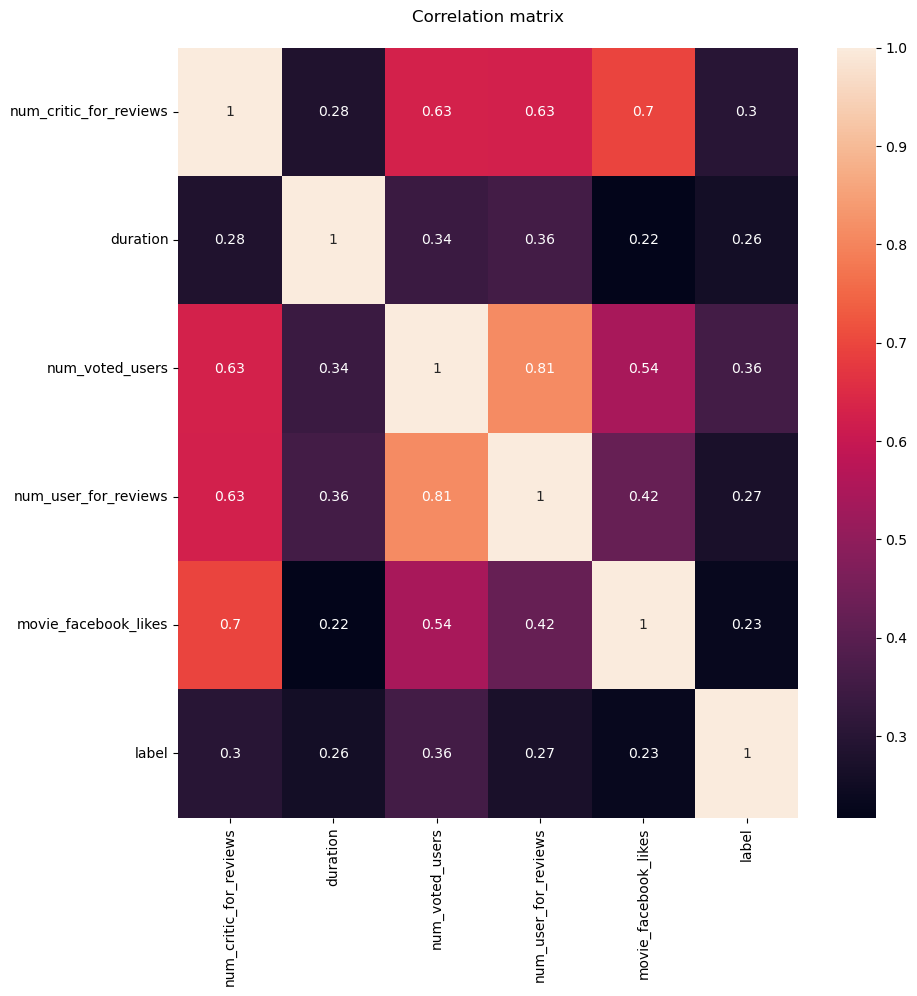

In [210]:
corr = df5.corr()
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(corr, annot = True)
heatmap.set(title = "Correlation matrix\n")  
plt.show()

num_user_for_review has high correlation with other features

In [211]:
df6 = df5.drop(columns=["num_user_for_reviews", "movie_facebook_likes"])
df6.corr()

,num_critic_for_reviews,duration,num_voted_users,label
num_critic_for_reviews,1.00,0.28,0.63,0.30
duration,0.28,1.00,0.34,0.26
num_voted_users,0.63,0.34,1.00,0.36
label,0.30,0.26,0.36,1.00


In [212]:
features = ["num_critic_for_reviews", "duration", "num_voted_users"]
y = df6.label
X = df6[features]

Scale the feature

In [213]:
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[features] = scaler.fit_transform(X[features])
X_scaled = X_scaled.add_prefix('scaled_')

X_scaled

,scaled_num_critic_for_reviews,scaled_duration,scaled_num_voted_users
0,4.65,2.73,5.23
1,1.29,2.38,2.50
3,5.37,2.19,6.92
6,2.01,1.88,1.93
7,1.47,-0.28,1.35
...,...,...,...
5031,-1.01,-0.97,-0.59
5033,0.02,-1.17,-0.11
5035,-0.67,-1.01,-0.25
5038,-1.11,-0.78,-0.59


In [240]:
",".join([f'"{col}"' for col in X_scaled.columns])

'"scaled_num_critic_for_reviews","scaled_duration","scaled_num_voted_users"'

Split the data

In [214]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,shuffle=True,random_state=100)
print("len(X_train) =", len(X_train))
print("len(X_test)  =", len(X_test))
print("len(y_train) =", len(y_train))
print("len(y_test)  =", len(y_test))

len(X_train) = 2685
len(X_test)  = 1152
len(y_train) = 2685
len(y_test)  = 1152


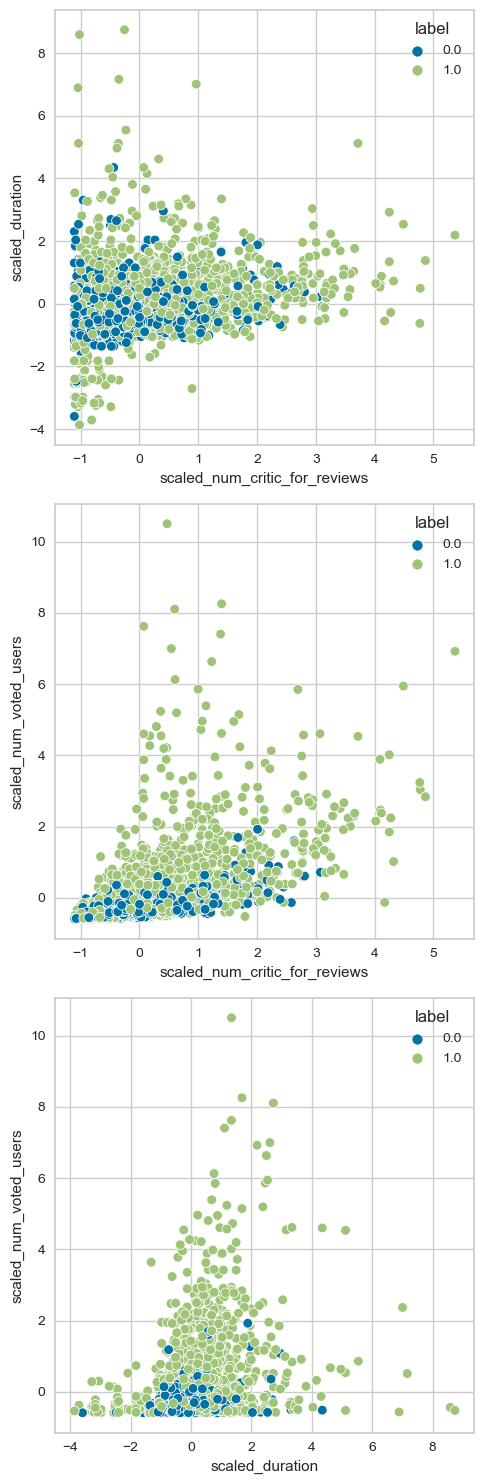

In [247]:
fig, axs = plt.subplots(3, 1, figsize=(5, 15))

sns.scatterplot(ax=axs[0],x=X_train["scaled_num_critic_for_reviews"], y=X_train["scaled_duration"], hue=y_train)
plt.xlabel('scaled_num_critic_for_reviews')
plt.ylabel('scaled_duration')

sns.scatterplot(ax=axs[1],x=X_train["scaled_num_critic_for_reviews"], y=X_train["scaled_num_voted_users"], hue=y_train)
plt.xlabel('scaled_num_critic_for_reviews')
plt.ylabel('scaled_num_voted_users')

sns.scatterplot(ax=axs[2],x=X_train["scaled_duration"], y=X_train["scaled_num_voted_users"], hue=y_train)
plt.xlabel('scaled_duration')
plt.ylabel('scaled_num_voted_users')

plt.tight_layout()
plt.show()

In [241]:
import plotly.express as px

# Create 3D scatter plot
fig = px.scatter_3d(X_train, x='scaled_num_critic_for_reviews', y='scaled_duration', z='scaled_num_voted_users', color=y_train)

# Show plot
fig.show()

# Model: SVM

In [236]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC,LinearSVC
from sklearn.kernel_approximation import Nystroem
from sklearn.inspection import permutation_importance

Model 1: SVC

In [217]:
svc = SVC(kernel='rbf', cache_size=200,max_iter=-1)
svc.fit(X_train, y_train)
y_train_pred=pd.DataFrame(svc.predict(X_train))
y_test_pred=pd.DataFrame(svc.predict(X_test))

In [218]:
print(f"#Num Support Vectors = {len(svc.support_)} (total vectors = {len(y_train)})")

#Num Support Vectors = 1632 (total vectors = 2685)


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.77      0.78      0.78       609
         1.0       0.75      0.75      0.75       543

    accuracy                           0.76      1152
   macro avg       0.76      0.76      0.76      1152
weighted avg       0.76      0.76      0.76      1152



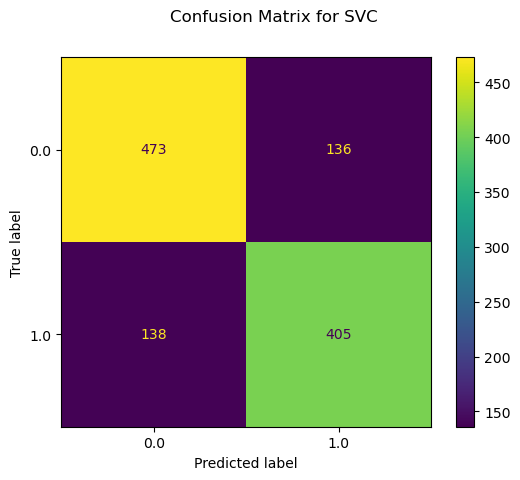

In [219]:
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred))
fig=metrics.plot_confusion_matrix(svc, X_test, y_test)
fig.figure_.suptitle("Confusion Matrix for SVC")
plt.show()

In [243]:
# Calculate permutation importances
result = permutation_importance(svc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Print feature importances
print("Feature (Permutation) Importances:")
for i, importance in enumerate(result.importances_mean):
    print(f"{X_train.columns[i]}: {importance}")

Feature (Permutation) Importances:
scaled_num_critic_for_reviews: 0.04149305555555557
scaled_duration: 0.13237847222222224
scaled_num_voted_users: 0.0921875


Model 2: GridSearchCV SVC

In [220]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
grid.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

SVC(C=100, gamma=0.1)

In [221]:
y_train_pred_g=pd.DataFrame(grid.predict(X_train))
y_test_pred_g=pd.DataFrame(grid.predict(X_test))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.81      0.78       609
         1.0       0.77      0.71      0.74       543

    accuracy                           0.76      1152
   macro avg       0.76      0.76      0.76      1152
weighted avg       0.76      0.76      0.76      1152



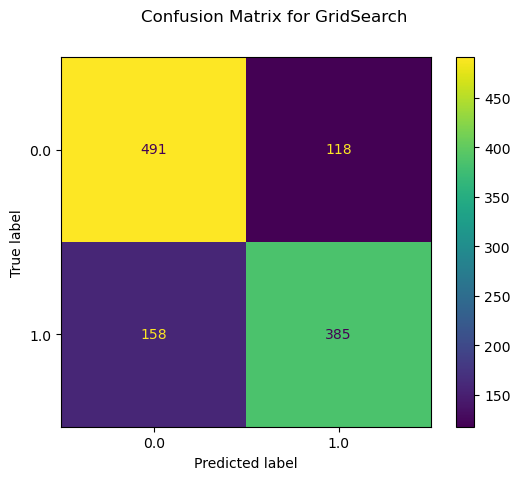

In [222]:
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred_g))
fig=metrics.plot_confusion_matrix(grid, X_test, y_test)
fig.figure_.suptitle("Confusion Matrix for GridSearch")
plt.show()

In [223]:
print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_params_)
print('Best Index: ', grid.best_index_)
print('Best Estimator: ', grid.best_estimator_)

Best Score:  0.7281191806331471
Best Params:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best Index:  39
Best Estimator:  SVC(C=100, gamma=0.1)


In [244]:
# Calculate permutation importances
result = permutation_importance(grid, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Print feature importances
print("Feature (Permutation) Importances:")
for i, importance in enumerate(result.importances_mean):
    print(f"{X_train.columns[i]}: {importance}")

Feature (Permutation) Importances:
scaled_num_critic_for_reviews: 0.04366319444444441
scaled_duration: 0.12760416666666666
scaled_num_voted_users: 0.0944444444444444


Model 3: Linear SVC with Nystroem

In [224]:
mapper=Nystroem(kernel='rbf', gamma=0.1,random_state=1,n_components=25)
# Use the Parameters from GridCV
mapper.fit(X_train)
X_train_k=pd.DataFrame(mapper.transform(X_train))
X_test_k=pd.DataFrame(mapper.transform(X_test))
X_train_k.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.09,0.23,0.14,0.23,0.01,0.25,0.23,0.23,0.22,0.25,...,0.22,0.01,0.26,0.12,0.11,0.21,0.03,0.25,0.25,0.24
1,0.12,0.17,0.19,0.22,0.02,0.24,0.26,0.27,0.19,0.18,...,0.15,0.01,0.17,0.20,0.24,0.26,0.07,0.11,0.17,0.27
2,0.26,0.09,0.20,0.13,0.08,0.23,0.19,0.31,0.10,0.10,...,0.11,-0.00,0.10,0.23,0.43,0.33,0.11,0.07,0.10,0.20
3,0.07,0.17,0.34,0.34,0.02,0.14,0.24,0.15,0.16,0.15,...,0.43,0.12,0.18,0.34,0.10,0.15,0.15,0.13,0.17,0.13
4,0.02,0.37,0.07,0.26,0.00,0.16,0.20,0.14,0.36,0.32,...,0.16,0.01,0.29,0.06,0.04,0.11,0.01,0.25,0.31,0.25


In [225]:
linearSVC = LinearSVC(max_iter=1000, C=100)
linearSVC.fit(X_train_k, y_train)
y_train_pred2=pd.DataFrame(linearSVC.predict(X_train_k))
y_test_pred2=pd.DataFrame(linearSVC.predict(X_test_k))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.81      0.78       609
         1.0       0.77      0.71      0.74       543

    accuracy                           0.76      1152
   macro avg       0.76      0.76      0.76      1152
weighted avg       0.76      0.76      0.76      1152



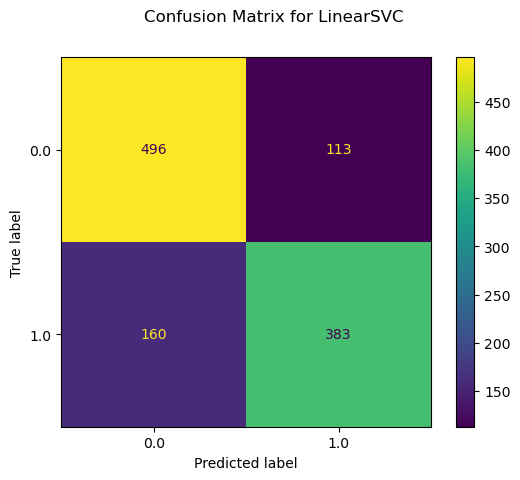

In [226]:
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred2))
fig=metrics.plot_confusion_matrix(linearSVC, X_test_k, y_test)
fig.figure_.suptitle("Confusion Matrix for LinearSVC")
plt.show()

In [248]:
# Get feature importances (coefficients) for linear SVC
feature_importances = np.abs(linearSVC.coef_)

# Print feature importances
print("Feature Importances:")
for i, importance in enumerate(feature_importances[0]):
    print(f"Feature {i+1}:\t{importance}")

Feature Importances:
Feature 1:	0.30088778072932243
Feature 2:	0.6674308536006593
Feature 3:	2.613754430525812
Feature 4:	2.463055947532329
Feature 5:	0.28094293638951395
Feature 6:	13.776151710710904
Feature 7:	1.1371565440374332
Feature 8:	4.022994511654394
Feature 9:	6.6971840852273745
Feature 10:	0.4407185993475042
Feature 11:	0.5858416216739584
Feature 12:	1.1710036534907606
Feature 13:	2.098862908349913
Feature 14:	0.6735231448312492
Feature 15:	0.353278342565955
Feature 16:	2.0532022918775437
Feature 17:	2.9089014350653093
Feature 18:	0.392813516907515
Feature 19:	4.308680461710431
Feature 20:	0.9810660153828189
Feature 21:	2.142410568560043
Feature 22:	1.2585034498801957
Feature 23:	0.48641320927574344
Feature 24:	0.23105179260501005
Feature 25:	8.21760081093035
